# Topic Modeling with ChatGPT Developer Mode & BERTopic

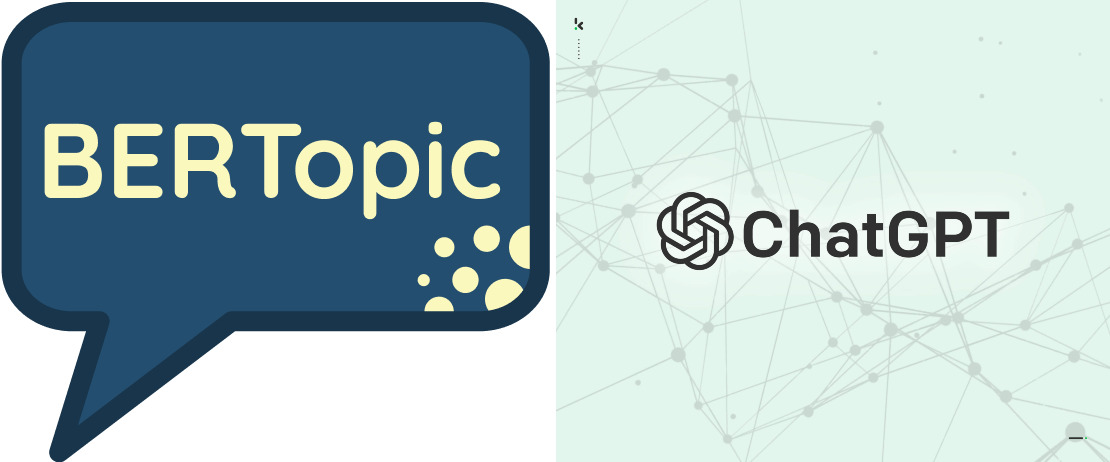

In this notebook I want to do a small practice of Topic Modeling first using Bertopic and second take benefit of ChatGPT developer mode.  

Topic modeling is a statistical technique that can be used to automatically discover the hidden topics in a collection of documents. This can be a valuable tool for getting new insights into the data, as it can help to identify patterns and relationships that would not be obvious from a simple text analysis.  

For example, topic modeling can be used to:   

- Identify the most important topics in a collection of documents.
- Track the evolution of topics over time.
- Find relationships between different topics.
- Identify outliers and anomalies.
- Generate new ideas and hypotheses.  

Topic modeling is a powerful tool that can be used to gain new insights from large amounts of text data. It is a valuable tool for researchers, businesses, and anyone else who wants to make sense of the vast amount of information that is available today. Some specific examples of how topic modeling has been used to get new insights:   
  
- Researchers have used topic modeling to study the evolution of language over time.
- Businesses have used topic modeling to improve their marketing campaigns and customer service.
- Journalists have used topic modeling to identify emerging trends and stories.
- Doctors have used topic modeling to better understand the symptoms and treatments of diseases.

### Data set from [Kaggle](https://www.kaggle.com/datasets/shreyasajal/linkedin-influencers-data)

### About Dataset:
This dataset contains LinkedIn Influencers' post details and other details(post dependent as well as independent) per post. This dataset can be used to analyze LinkedIn reach based on post content and related account details. This dataset is great for Exploratory Data Analysis and NLP tasks.

## Read Data and Pre-proseccing 

In [6]:
# import and installation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)
# read data
df = pd.read_csv('influencers_data.csv')

In [8]:
print(f'Shape of DataFrame:\n{df.shape}\n')
print('Info and Data Types:\n')
print(df.info())
print(f'\nCheck for null values:\n{df.isna().sum()} \n')
print('\nFirst 5 rows of the second DataFrame:\n')
df.head()

Shape of DataFrame:
(34012, 19)

Info and Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34012 entries, 0 to 34011
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         34012 non-null  int64  
 1   name               34012 non-null  object 
 2   headline           34012 non-null  object 
 3   location           31740 non-null  object 
 4   followers          33970 non-null  float64
 5   connections        25713 non-null  object 
 6   about              34012 non-null  object 
 7   time_spent         34011 non-null  object 
 8   content            31996 non-null  object 
 9   content_links      34012 non-null  object 
 10  media_type         26779 non-null  object 
 11  media_url          34012 non-null  object 
 12  num_hashtags       34012 non-null  int64  
 13  hashtag_followers  34012 non-null  int64  
 14  hashtags           34012 non-null  object 
 15  reactions      

,Unnamed: 0,name,headline,location,followers,...,hashtags,reactions,comments,views,votes
0,0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,...,"[['#workbasedlearning', 'https://www.linkedin....",12,1,NaN,NaN
1,1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,...,[],11,0,NaN,NaN
2,2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,...,[],15,0,NaN,NaN
3,3,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,...,"[['#careerplanning', 'https://www.linkedin.com...",44,0,NaN,NaN
4,4,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,...,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2,NaN,NaN


In [9]:
# Data Cleaning
df.drop(df.columns[0], axis=1, inplace=True)
df.drop('views', axis=1, inplace=True)
df.about = df.about.astype("category")
df.headline = df.headline.astype("category")

In [10]:
print(f'Unique number of names: {df.name.nunique()}')
df['name'].value_counts()

Unique number of names: 69


name
Shelly Palmer                 1920
Bertalan Meskó, MD, PhD       1846
Mohamed El-Erian              1784
Sramana Mitra                 1609
Rachel Jones                  1375
Nir Eyal                      1358
Carson Tate                   1304
🏉 Pascal Bouvier              1278
Tom Goodwin                   1272
Lynne Everatt                 1220
James Altucher                1125
Jody Padar                    1005
Katie Martell                  984
Richard Branson                975
Vani Kola                      949
Danielle Newnham               688
Shama Hyder                    687
Michelle Chaffee               617
Karen Gross                    601
Ian Bremmer                    590
Neil Hughes                    567
Amy Blaschka                   540
Geoffrey Garrett               519
Karen Webster                  469
Barry W. Enderwick             465
Justin Bariso                  459
AJ Wilcox                      447
Kevin O'Leary                  424
Yasi Baiani    

## Topic Modeling

### Topic Modelling with BERTopic

In [ ]:
# imports
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

### Run Topic modeling on Content column where the name is for example "Influencer1"

Let's check the post wrote by "Influencer1" for example 

In [8]:
%%time

text = df[(df['name']=='Influencer1') & (df['content'].notna())]['content'].unique()
docs = list(text)

# Fine-tune the topic representations
representation_model = KeyBERTInspired()
# set the model and parameters
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2",
                                   representation_model=representation_model,
                                   calculate_probabilities=True)

topics, probs = topic_model.fit_transform(docs)

CPU times: total: 7min 33s
Wall time: 4min 8s


In [25]:
# you can save and load the Model for future use
#save
import pickle
model1_output = 'path.pkl'
with open(model1_output, 'wb') as f:
    pickle.dump(topic_model, f)
# load
import pickle
model1_output = 'path.pkl'
with open(model1_output, 'rb') as f:
    model1_load = pickle.load(f)

In [26]:
# summary of reult
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,97,-1_trust_optimism_lessons_listen,"[trust, optimism, lessons, listen, lives, podc...",[Are you honest? Have you ever told a lie? You...
1,0,24,0_happiness_life_living_fulfillment,"[happiness, life, living, fulfillment, purpose...",[Happiness comes from WHAT we do. Fulfillment ...
2,1,22,1_podcast_conversations_podcasts_conversation,"[podcast, conversations, podcasts, conversatio...",[Occasionally I get to meet someone whose stor...
3,2,20,2_leaders_leadership_leader_leaderseatlast,"[leaders, leadership, leader, leaderseatlast, ...",[Remember to take care of the people to the le...
4,3,20,3_bookclubwithsimon_bookclub_book_simonsinek,"[bookclubwithsimon, bookclub, book, simonsinek...","[Book club starts this week! Find a friend, re..."
5,4,20,4_chapters_bookclub_book_books,"[chapters, bookclub, book, books, theinfiniteg...",[Book Club is back! Join me to discuss chapter...
6,5,15,5_classes_tuesday_wednesday_online,"[classes, tuesday, wednesday, online, 7pm, mon...",[Here are next week’s LIVE online classes. Sig...
7,6,14,6_inspire_unite_journey_leadership,"[inspire, unite, journey, leadership, going, p...",[Honored to have made the #SUCCESS25 list for ...
8,7,10,7_infinite_theinfinitegame_infinitemindset_min...,"[infinite, theinfinitegame, infinitemindset, m...","[Many people have theories, but what philosoph..."


### Visualization

#### Hierarchical Documents and Topics

In [34]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP
hierarchical_topics = topic_model.hierarchical_topics(docs)

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(docs, show_progress_bar=False)

# Run the visualization with the original embeddings
# Define the number of levels for the hierarchical visualization
nr_levels = 3  # You can change this to the desired number of levels
topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, embeddings=embeddings, nr_levels=nr_levels)

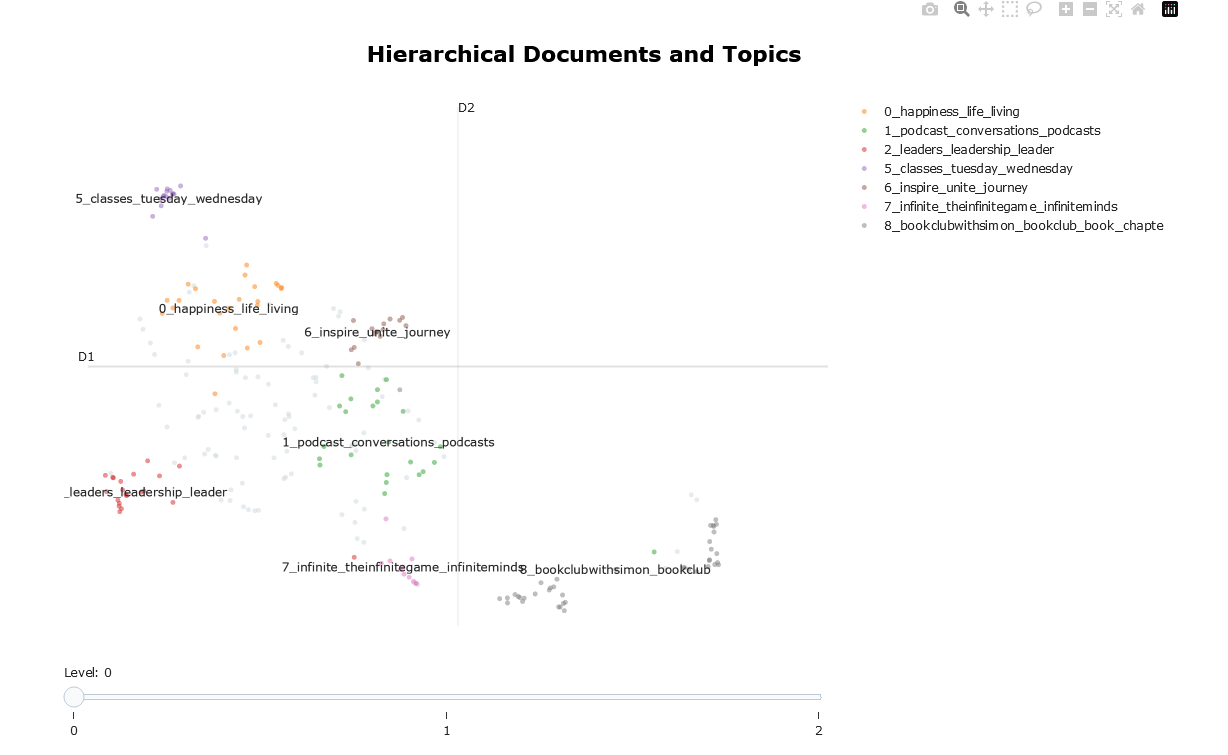

#### Hierarchical Clustering

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

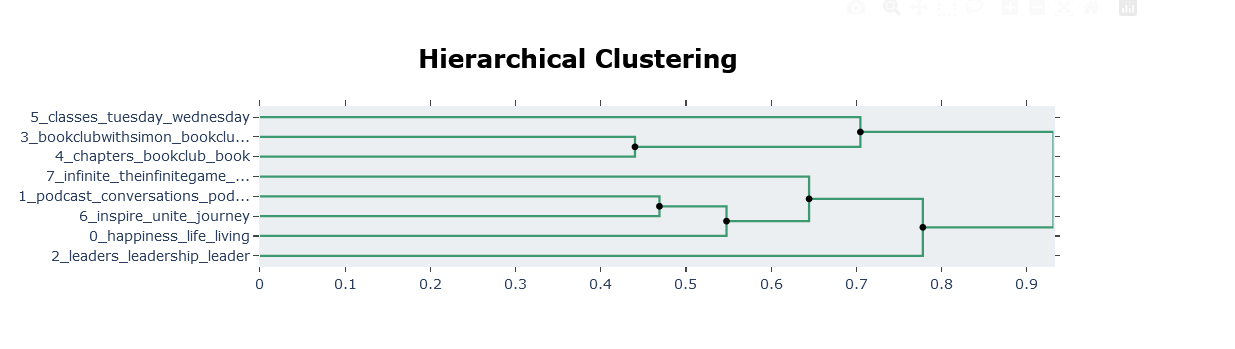

#### Intertopic Distance Map

In [ ]:
# Intertopic Distance Map
topic_model.visualize_topics()

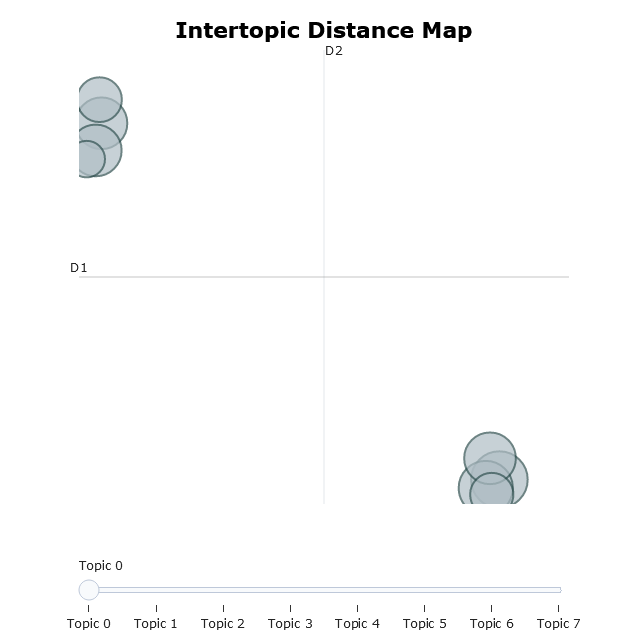

#### Similarity Matrix

In [ ]:
topic_model.visualize_heatmap()

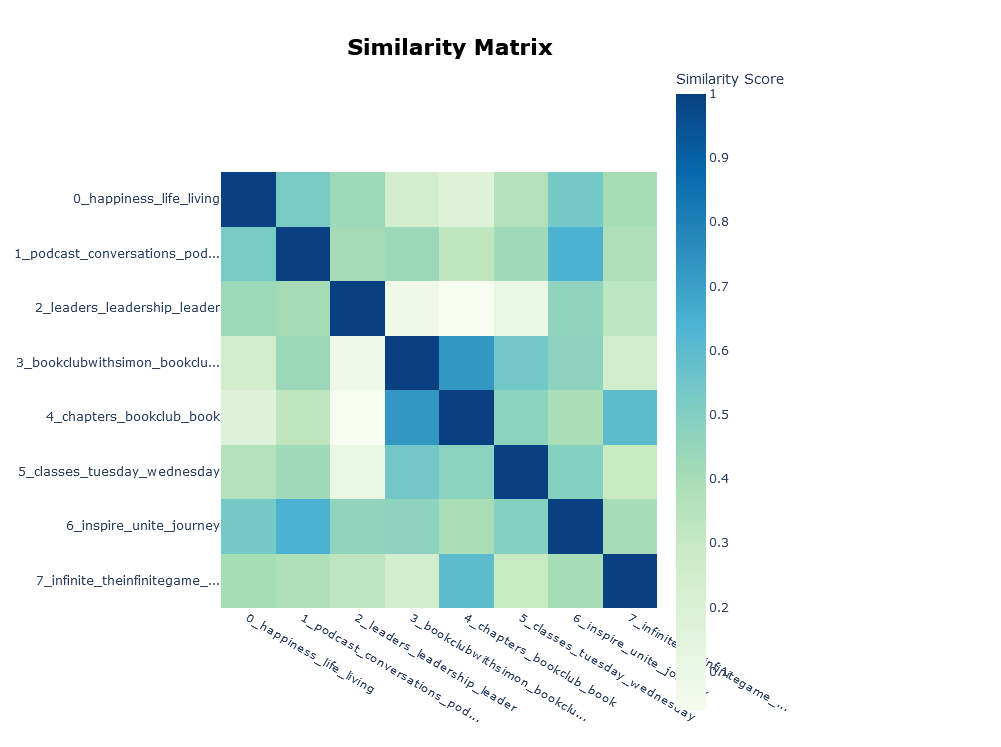

## Topic Modeling with ChatGPT 

In [ ]:
# install and imports
import openai 
import requests

This time let's do Topic Modeling on Posts from the same person "Inlfuencer1"

In [34]:
# Get the API key from the environment
# Set your API key.
openai.api_key = 'API_Code'

# Define a function to get a response from ChatGPT.
def get_completion(prompt):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", messages=messages, temperature=0
    )
    return response.choices[0].message["content"]

text = df[(df['name']=='Inlfuencer1') & (df['content'].notna())]['content'].unique()
docs = pd.DataFrame(text)
docs.rename(columns={0:'post'}, inplace=True)
docs['GPT_Topics'] = np.nan

Here the loop below iterate over group of 10 posts and ask a question and store the result.  
We do so because there is a limit of input text for Generative AI Models and when the input is too long then accuracy might decrease.

In [36]:
%%time
import time
# Loop through the list of docs in groups of 10
topics = []
for i in range(0, len(docs['post']), 10):
    # Extract the next 10 posts for this iteration
    p = docs['post'][i:i+10]

    try:
        topics.append(get_completion(f'just give 5 names of topics that can best describe these LinkedIn posts and do not write more:  {p}'))
    except Exception as e:
        time.sleep(20)
        
    


Now I got a list representing all the topics using the request in chatgpt platform:

In [38]:
topics = [
    'Personal empowerment and responsibility',
    'Influence of external factors on opinions',
    'Leadership and mindset',
    'Self-care and happiness',
    'Building a better world',
    'Entrepreneurship and Career Development',
    'Ambition and Perseverance',
    'Pursuing Amazing Opportunities',
    'Teamwork and Collaboration',
    'Seeking Truth in Business',
    'Personal Growth and Transformation',
    'Belief and Greatness',
    'Transition from military to civilian life',
    'Importance of caring for employees',
    'The guiding force of our WHY',
    'The polarized world we live in',
    'Money and Success',
    'Business and Competition',
    'Effective communication and active listening',
    'Optimism and positivity',
    'Leadership and belief in others',
    'Making a difference and changing the world',
    'Book Club announcement',
    'Influence of money and the internet',
    'Doing the right thing',
    'Extraordinary women',
    'Infinite mindset',
    'Live online events',
    'Money and legacy',
    'Landing a job you love',
    'Difficult conversations',
    'Being positive and proactive',
    'Helping each other',
    'Esther Perel',
    'Podcast',
    'Taking care of others',
    'Personal development',
    'Perception and mindset',
    'Gratitude and appreciation',
    'Service and giving back',
    'Announcement of a new project or tour',
    'Value and determination in business',
    'Gratitude and appreciation for support and patience',
    'Personal growth and resilience',
    'Inspiration and dreams',
    'Courage and leadership',
    'Networking and its true value',
    'Stress management',
    'Company responsibility',
    'Finding purpose',
    'Recognition and Achievement',
    'Professional Development and Networking',
    'Growth Mindset and Accountability',
    'Career Opportunities and Deadlines'
]


### Assign Topic to Posts 

Next step is that to ask from ChatGPT each time for a post to see which topic or topics fits best from the topics list that we got before.    
**Note:** The most tricky part is the prompt text to ChatGPT. I for exmple tested different promts so finally saw that this promt is good enough.  

In [ ]:
%%time
import time
# Loop through the list of docs
for i in range(len(docs['post'])):
    p = docs['post'][i]
    response = ''  
    while response == '':
        try:
            response = get_completion(
                f'Task: For the post below please select topics from the list of topics below which fits the meaning of the post at best.\
                Note: The post can have 1 or 2 or maximum 3 related topics.\
                As the result just write a list of topics for the post like [topic1, topic2 (if exist), topic 3 (if exist)].\
                Do not write the post itself again. Do not write further explanation.\nPost:\n"{p}" \n List of topics:\n {topics}')
        except Exception as e:
            time.sleep(20)
                    
    docs.at[i, 'GPT_Topics'] = response
    print(f'{i} Topics:\n{response}\n')
    

In [ ]:
# save the result
docs.to_csv('GPT_Topics_Inlfuencer1.csv', index=False)

In [38]:
# first 10 posts and their topics
docs.head(10)

,post,GPT_Topics
0,We are only in charge when we are willing to let others take charge.,"['Leadership and mindset', 'Teamwork and Collaboration']"
1,"When the people have to manage dangers from inside the organization, the organization itself becomes less able to face the dangers from outside.","['Company responsibility', 'Leadership and mindset']"
2,Where do our opinions come from? Could our assumptions be incorrect? How do we really listen and challenge assumptions while remaining civil to our fellow humans During this live online class with...,"['Influence of external factors on opinions', 'Effective communication and active listening']"
3,If you have an infinite mindset but your leadership does not - this one's for you.,"['Leadership and mindset', 'Infinite mindset']"
4,"If you want to feel happy, do something for yourself. If you want to feel fulfilled, do something for someone else.","['Self-care and happiness', 'Service and giving back']"
5,"Before we can build the world we want to live in, we have to imagine it. Greatness starts with a clear vision of the future.","['Building a better world', 'Personal Growth and Transformation', 'Belief and Greatness']"
6,"So you've found your WHY...now what? This live online class will show you how to align your WHY with your current life, future opportunities and how it all ties together. You'll leave with a roadm...","['Personal growth and transformation', 'Finding purpose']"
7,A mentor is not someone who walks ahead of us to show us how they did it. A mentor walks alongside us to show us what we can do.,"['Personal empowerment and responsibility', 'Leadership and mindset', 'Personal Growth and Transformation']"
8,Brené Brown is so good at figuring out how to take a concept and make it practical for real life. It was such a thrill to join her on her Dare to Lead podcast last week. We talked about how we ca...,"['Leadership and mindset', 'Personal Growth and Transformation', 'Podcast']"
9,"We can't be everything to everyone, but we can be something to someone...even a lot of someones.","['Personal empowerment and responsibility', 'Self-care and happiness', 'Building a better world']"


Based on the results, it's clear that ChatGPT's responses are quite coherent althouth the Bertopic model was not fine tuned. However, Bertopic offers user-friendly visualization tools, making it a valuable resource. I hope that this notebook will be valuable to those who are interested in content analysis and topic modeling.

**Note**: this notebook is just for educational purpose and nothing more.

Reference:  
[BERTopic](https://maartengr.github.io/BERTopic/index.html)  
[ChatGPT, OpenAI](https://openai.com/)  
[Image](https://www.klippa.com/de/blog/informativ/was-ist-chatgpt/)